In [24]:
import pandas as pd
import numpy as np
from pandasql import sqldf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("athlete_events.csv")
df2 = pd.read_csv("noc_regions.csv")


In [3]:
pysqldf = lambda q: sqldf(q, globals())

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


In [6]:

print(df.head())
print(df2.head())


print(df.info())
print(df2.info())


   ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's

In [7]:
median_age = df['Age'].median()
median_height = df['Height'].median()
median_weight = df['Weight'].median()

In [8]:

globals().update({
    "median_age": median_age,
    "median_height": median_height,
    "median_weight": median_weight
})

In [9]:
# SQL to fill missing values with medians for Age, Height, Weight in athlete_events
q1 = f"""
SELECT 
    ID,
    Name,
    Sex,
    COALESCE(Age, {median_age}) AS Age,
    COALESCE(Height, {median_height}) AS Height,
    COALESCE(Weight, {median_weight}) AS Weight,
    Team,
    NOC,
    Games,
    Year,
    Season,
    City,
    Sport,
    Event,
    COALESCE(Medal, 'No Medal') AS Medal
FROM df;
"""

df = pysqldf(q1)


print(df.head())


   ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0   175.0    70.0         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0   175.0    70.0  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event     Medal  
0       Basketball Men's Basketball  No Medal  
1      Judo Men's Extra-Lightweight  No Medal  
2           Fo

In [10]:
df2['region'].fillna('Unknown', inplace=True)
df2.drop(columns='notes', inplace=True)

C:\Users\omarb\AppData\Local\Temp\ipykernel_29280\3871395036.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['region'].fillna('Unknown', inplace=True)


In [11]:
# Merge the DataFrames on 'NOC'
q2 = """
SELECT 
    a.*,
    b.region
FROM df AS a
LEFT JOIN df2 AS b
ON a.NOC = b.NOC;
"""

merged_df = pysqldf(q2)


In [12]:
merged_df.drop_duplicates(inplace=True)

In [13]:
merged_df['Year'] = merged_df['Year'].astype(int)

In [14]:
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 269731 entries, 0 to 271115
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      269731 non-null  int64  
 1   Name    269731 non-null  object 
 2   Sex     269731 non-null  object 
 3   Age     269731 non-null  float64
 4   Height  269731 non-null  float64
 5   Weight  269731 non-null  float64
 6   Team    269731 non-null  object 
 7   NOC     269731 non-null  object 
 8   Games   269731 non-null  object 
 9   Year    269731 non-null  int32  
 10  Season  269731 non-null  object 
 11  City    269731 non-null  object 
 12  Sport   269731 non-null  object 
 13  Event   269731 non-null  object 
 14  Medal   269731 non-null  object 
 15  region  269382 non-null  object 
dtypes: float64(3), int32(1), int64(1), object(11)
memory usage: 34.0+ MB
None


In [15]:

merged_df['region'].fillna('Unknown', inplace=True)


merged_df['Age'] = merged_df['Age'].astype(int)
merged_df['Height'] = merged_df['Height'].astype(int)
merged_df['Weight'] = merged_df['Weight'].astype(int)


print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 269731 entries, 0 to 271115
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   ID      269731 non-null  int64 
 1   Name    269731 non-null  object
 2   Sex     269731 non-null  object
 3   Age     269731 non-null  int32 
 4   Height  269731 non-null  int32 
 5   Weight  269731 non-null  int32 
 6   Team    269731 non-null  object
 7   NOC     269731 non-null  object
 8   Games   269731 non-null  object
 9   Year    269731 non-null  int32 
 10  Season  269731 non-null  object
 11  City    269731 non-null  object
 12  Sport   269731 non-null  object
 13  Event   269731 non-null  object
 14  Medal   269731 non-null  object
 15  region  269731 non-null  object
dtypes: int32(4), int64(1), object(11)
memory usage: 30.9+ MB
None


C:\Users\omarb\AppData\Local\Temp\ipykernel_29280\3086428540.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['region'].fillna('Unknown', inplace=True)


In [16]:
# Descriptive statistics for numerical columns
print(merged_df.describe())

# Descriptive statistics for categorical data
print(merged_df.describe(include='object'))


                  ID            Age         Height         Weight  \
count  269731.000000  269731.000000  269731.000000  269731.000000   
mean    68264.949591      25.404536     175.265046      70.539738   
std     39026.253843       6.062324       9.302366      12.609513   
min         1.000000      10.000000     127.000000      25.000000   
25%     34655.500000      22.000000     170.000000      63.000000   
50%     68233.000000      24.000000     175.000000      70.000000   
75%    102111.000000      28.000000     180.000000      76.000000   
max    135571.000000      97.000000     226.000000     214.000000   

                Year  
count  269731.000000  
mean     1978.623073  
std        29.752055  
min      1896.000000  
25%      1960.000000  
50%      1988.000000  
75%      2002.000000  
max      2016.000000  
                            Name     Sex           Team     NOC        Games  \
count                     269731  269731         269731  269731       269731   
unique     

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")


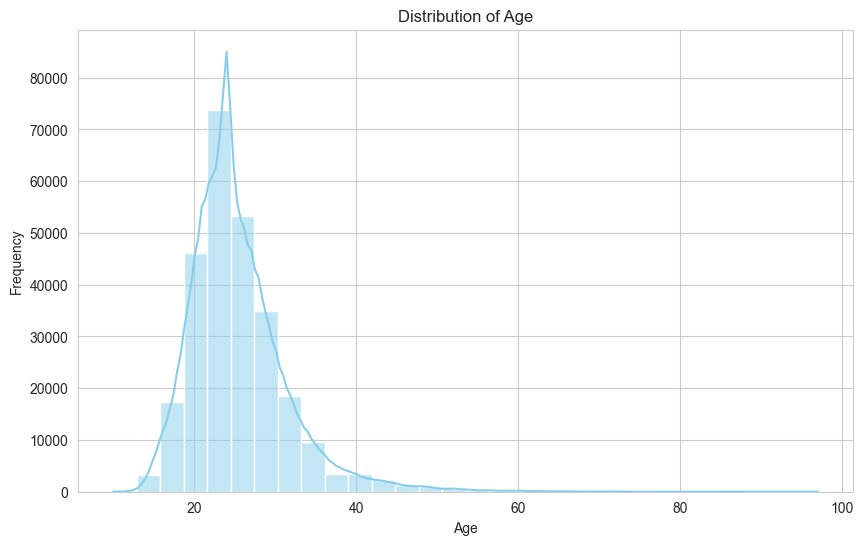

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Age'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


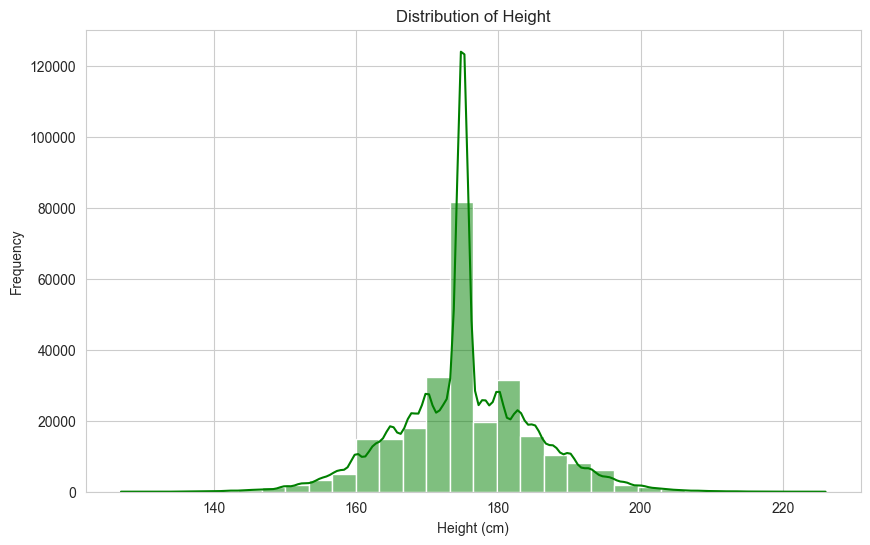

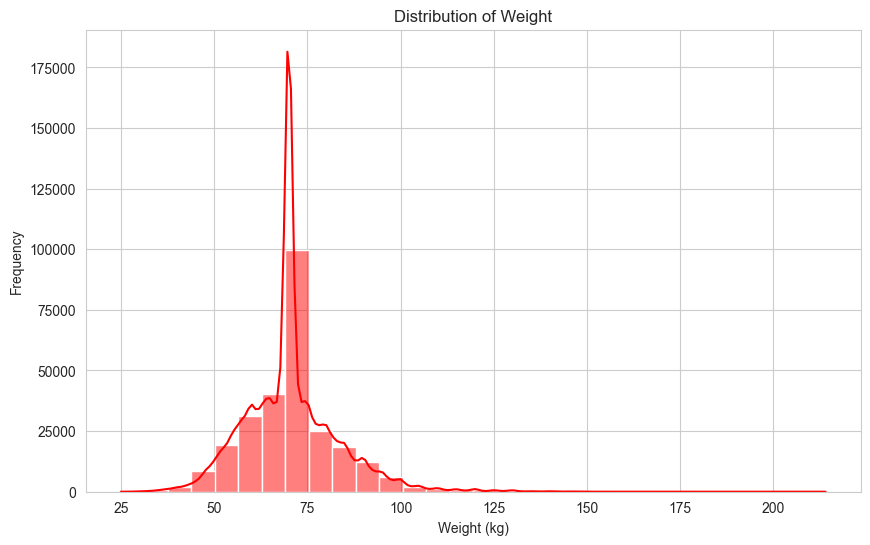

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Height'], bins=30, kde=True, color='green')
plt.title('Distribution of Height')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Weight'], bins=30, kde=True, color='red')
plt.title('Distribution of Weight')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.show()


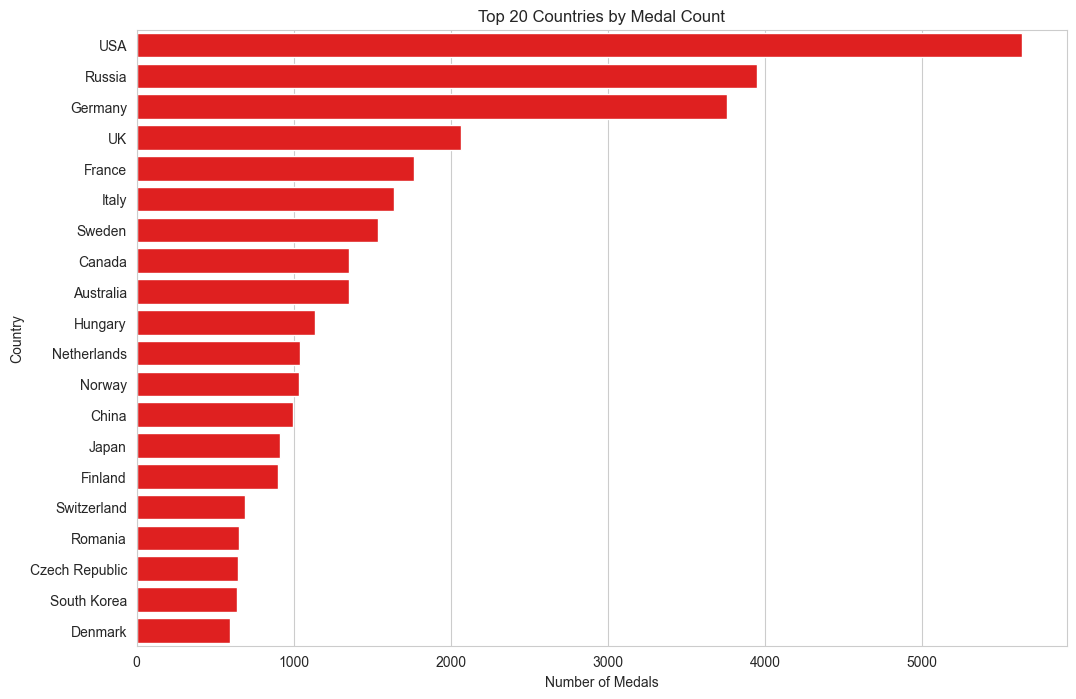

In [20]:
medal_counts = merged_df[merged_df['Medal'] != 'No Medal'].groupby('region')['Medal'].count().sort_values(ascending=False).head(20)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x=medal_counts.values, y=medal_counts.index, color='Red')  # Removed palette parameter for simplicity
plt.title('Top 20 Countries by Medal Count')
plt.xlabel('Number of Medals')
plt.ylabel('Country')
plt.show()

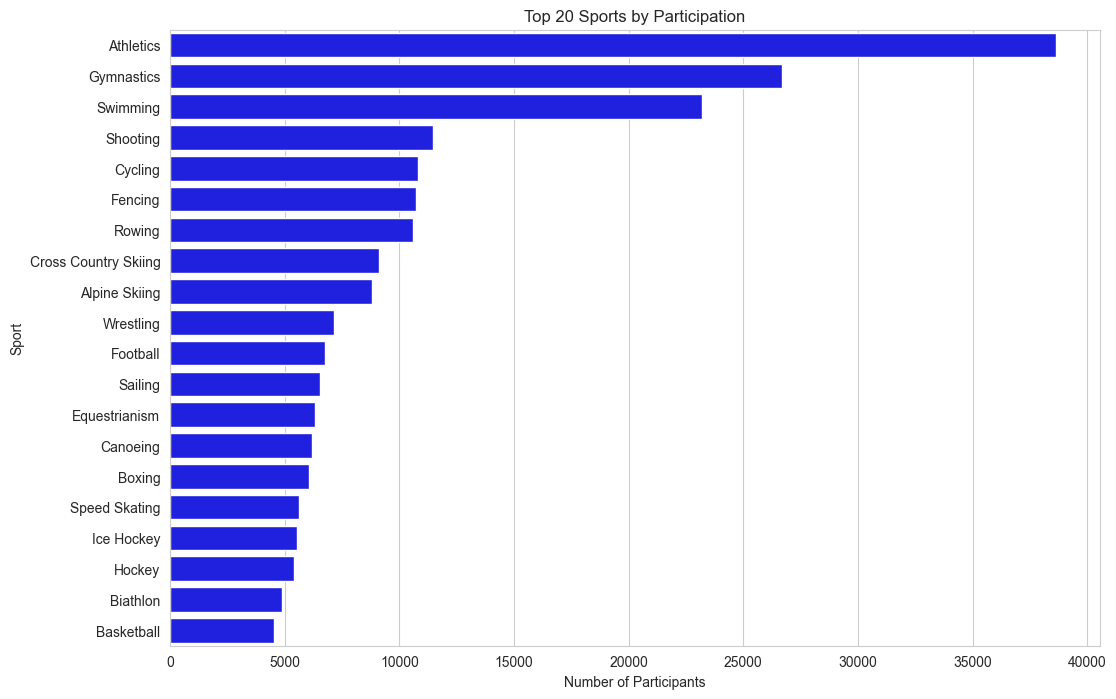

In [21]:
sports_counts = merged_df['Sport'].value_counts().head(20)
plt.figure(figsize=(12, 8))
sns.barplot(x=sports_counts.values, y=sports_counts.index, color='Blue')
plt.title('Top 20 Sports by Participation')
plt.xlabel('Number of Participants')
plt.ylabel('Sport')
plt.show()


In [22]:
correlation_matrix = merged_df[['Age', 'Height', 'Weight']].corr()
print(correlation_matrix)

             Age    Height    Weight
Age     1.000000  0.109734  0.165535
Height  0.109734  1.000000  0.786752
Weight  0.165535  0.786752  1.000000


In [25]:
# Prepare data
X = df[['Height']]  # Predictor
y = df['Weight']    # Response

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create linear regression object
reg = LinearRegression()

# Train the model using the training sets
reg.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = reg.predict(X_test)

# Output the coefficients
print('Coefficients:', reg.coef_)


Coefficients: [1.06757651]
